## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

Создание датафреймов:

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [184]:
boston = load_boston()

In [185]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [186]:
data = boston['data']
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [187]:
feature_names = boston['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [188]:
X = pd.DataFrame(data, columns=feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [189]:
target = boston['target']
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [190]:
y = pd.DataFrame(target, columns=['price'])
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Разбиение датафреймов на тренировочные и тестовые:

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабирование данных:

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaler = MinMaxScaler()
X_train_scaled =  pd.DataFrame(scaler.fit_transform(X_train), columns=[feature_names])
X_train_scaled.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
5,0.002055,0.00,0.245926,0.0,0.222222,0.522270,0.121524,0.389773,0.173913,0.190840,0.744681,0.991881,0.092439
6,0.000343,0.00,0.164815,0.0,0.267490,0.442140,0.325438,0.441552,0.173913,0.070611,0.808511,1.000000,0.173289
7,0.000129,0.85,0.000000,0.0,0.051440,0.512508,0.337796,0.732752,0.043478,0.240458,0.500000,1.000000,0.111479
8,0.170491,0.00,0.642963,0.0,0.730453,0.465528,1.000000,0.071347,1.000000,0.914122,0.808511,0.022694,0.682119
9,0.162186,0.00,0.642963,0.0,0.436214,0.607891,1.000000,0.030545,1.000000,0.914122,0.808511,0.451460,0.498068


Построение модели TSNE:

In [195]:
from sklearn.manifold import TSNE

In [196]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f"До:  {X_train_scaled.shape}")
print(f"Послe: {X_train_tsne.shape}")

До:  (404, 13)
Послe: (404, 2)


In [197]:
X_train_tsne[:10]

array([[ 38.017426 ,  -2.9631803],
       [-16.354012 ,   6.5647717],
       [-23.038189 ,  -8.189647 ],
       [ 36.249966 , -13.95012  ],
       [-13.312722 ,  11.923069 ],
       [-19.431011 ,   2.1992998],
       [-18.631935 ,   4.3247337],
       [-25.69127  , -13.336495 ],
       [ 35.110455 , -14.607656 ],
       [ 35.608665 , -11.061712 ]], dtype=float32)

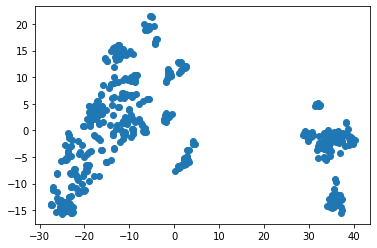

In [198]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Кластеризация данных методом KMeans:

In [199]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [200]:
train_labels = model.fit_predict(X_train_tsne)
train_labels[:10]

array([1, 0, 2, 1, 0, 2, 0, 2, 1, 1], dtype=int32)

Построение диаграмм рассеяния:

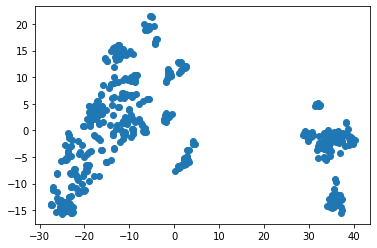

In [201]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [202]:
centers = model.cluster_centers_
centers

array([[ -7.6533084,   6.7691903],
       [ 34.777084 ,  -4.457756 ],
       [-21.579605 ,  -7.4152627]], dtype=float32)

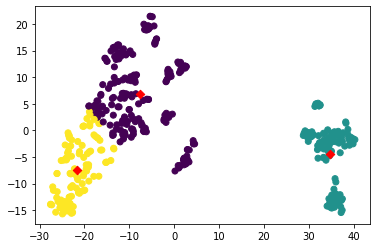

In [203]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

Вычисление средних:

In [204]:
X_train['CRIM'][train_labels == 0].mean()

0.6016370103092784

In [218]:
X_train['CRIM'][train_labels == 1].mean()

13.17982178217822

In [219]:
X_train['CRIM'][train_labels == 2].mean()

0.09364009174311928

In [205]:
y_train[train_labels == 0].mean()

price    24.254124
dtype: float64

In [220]:
y_train[train_labels == 1].mean()

price    16.277228
dtype: float64

In [221]:
y_train[train_labels == 2].mean()

price    26.243119
dtype: float64

### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Предобработка тестовых данных:

In [209]:
X_test_scaled =  pd.DataFrame(scaler.fit_transform(X_test), columns=[feature_names])

In [213]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne[:10]

array([[-6.04574   , -2.6453695 ],
       [-8.981183  , -1.054302  ],
       [-1.9677387 ,  1.3523834 ],
       [-6.0040956 , -6.743715  ],
       [11.832489  , 13.917294  ],
       [-4.415335  , -3.1895835 ],
       [-4.1188707 , -2.246242  ],
       [-2.5312352 ,  0.41524607],
       [10.938494  , 13.561685  ],
       [-4.098123  , -1.849489  ]], dtype=float32)

In [217]:
test_labels = model.predict(X_test_tsne)
test_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Вычисление средних:

In [225]:
X_test['CRIM'][test_labels == 0].mean()

3.9783896774193552

In [228]:
X_test['CRIM'][test_labels == 1].mean()

nan

In [229]:
X_test['CRIM'][test_labels == 2].mean()

0.04070333333333334

In [230]:
y_test[test_labels == 0].mean()

price    20.247312
dtype: float64

In [231]:
y_test[test_labels == 1].mean()

price   NaN
dtype: float64

In [232]:
y_test[test_labels == 2].mean()

price    34.311111
dtype: float64